In [1]:
from neuralnet import NeuralNet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.describe(include=np.number)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [58]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

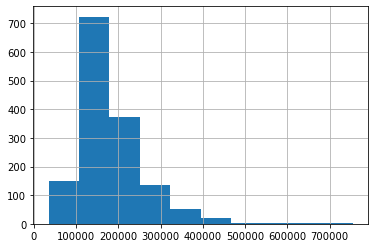

In [4]:
train['SalePrice'].hist()

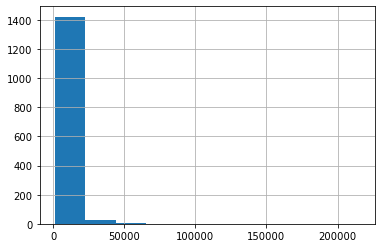

In [5]:
train['LotArea'].hist()

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Training with one feature - LotArea

In [7]:
X = train['LotArea'].values.reshape(-1,1)
y = train['SalePrice'].values.reshape(-1,1)

In [8]:
# Standardize the dataset
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [9]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Initialize the NeuralNet class
eta = 0.001
n_iter = 200
layer_sizes = [X_train.shape[1], 64, 32, 1]  # Example layer sizes
neural_net = NeuralNet(X_train, y_train, layer_sizes, eta=eta, n_iter=n_iter, initialization_method='he', lambd=0.01)

In [18]:
# Train the neural network
neural_net.train(batch_size=32)

Epoch 1/200, Batch 1/31, Loss: 2.489970097106421
Epoch 1/200, Batch 11/31, Loss: 1.5675046909014745
Epoch 1/200, Batch 21/31, Loss: 1.9533796778716819
Epoch 1/200, Batch 31/31, Loss: 3.8064380953901362
Epoch 2/200, Batch 1/31, Loss: 4.126282132690403
Epoch 2/200, Batch 11/31, Loss: 1.634629328540408
Epoch 2/200, Batch 21/31, Loss: 0.977224292108248
Epoch 2/200, Batch 31/31, Loss: 1.0027564467354375
Epoch 3/200, Batch 1/31, Loss: 1.0962338376566985
Epoch 3/200, Batch 11/31, Loss: 1.747377515294467
Epoch 3/200, Batch 21/31, Loss: 2.4845478752578405
Epoch 3/200, Batch 31/31, Loss: 1.5515767303008343
Epoch 4/200, Batch 1/31, Loss: 1.3074416877783592
Epoch 4/200, Batch 11/31, Loss: 1.6395660595751274
Epoch 4/200, Batch 21/31, Loss: 2.008342720926298
Epoch 4/200, Batch 31/31, Loss: 1.9461522462242948
Epoch 5/200, Batch 1/31, Loss: 2.10587168993964
Epoch 5/200, Batch 11/31, Loss: 2.956178948516086
Epoch 5/200, Batch 21/31, Loss: 1.002804470816957
Epoch 5/200, Batch 31/31, Loss: 1.618682705134

In [19]:
# Evaluate the neural network on the test set
predictions = neural_net.predict(X_test)
predictions = scaler_y.inverse_transform(predictions)  # Reverse scaling
y_test_orig = scaler_y.inverse_transform(y_test)  # Reverse scaling

In [20]:
predictions[0], y_test_orig[0]

(array([177305.33863903]), array([154500.]))

In [21]:
# Evaluate the neural network on the test set
test_loss = neural_net.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

Test Loss: 1.2391020630494127


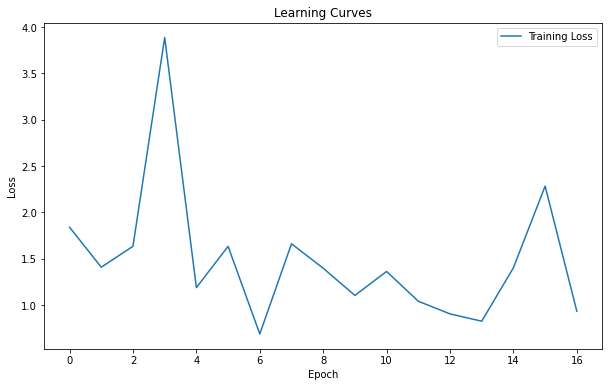

In [22]:
# Visualize learning curves
neural_net.visualize_learning_curves()

## Training with multiple features

In [59]:
# Select the 'LotArea' and 'GrLivArea' columns
selected_features = train[['LotArea', 'GrLivArea']].values

# Convert the selected features to a NumPy array
X = selected_features

# Print the shape of X_train to verify
print(X.shape)

(1460, 2)


In [60]:
# Extract the target variable 'SalePrice'
y = train['SalePrice'].values.reshape(-1,1)

# Print the shape of y_train to verify
print(y.shape)

(1460, 1)


In [61]:
# Standardize the dataset
scaler_two_X = StandardScaler()
scaler_two_y = StandardScaler()

X = scaler_two_X.fit_transform(X)
y = scaler_two_y.fit_transform(y)

In [62]:
# Split into training and test sets
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
# Initialize the NeuralNet class
eta = 0.001
n_iter = 200
layer_sizes = [X_train_two.shape[1], 64, 32, 1]  # Example layer sizes
neural_net = NeuralNet(X_train_two, y_train_two, layer_sizes, eta=eta, n_iter=n_iter, initialization_method='he', lambd=0.01)

In [64]:
# Train the neural network
neural_net.train(batch_size=32)

Epoch 1/200, Batch 1/31, Loss: 0.7876743793891277
Epoch 1/200, Batch 11/31, Loss: 0.5207114767756998
Epoch 1/200, Batch 21/31, Loss: 0.7823785501462548
Epoch 1/200, Batch 31/31, Loss: 1.2389168693235724
Epoch 2/200, Batch 1/31, Loss: 0.5815224751495897
Epoch 2/200, Batch 11/31, Loss: 0.8610711762004177
Epoch 2/200, Batch 21/31, Loss: 0.8346880645272221
Epoch 2/200, Batch 31/31, Loss: 0.4368942700460337
Epoch 3/200, Batch 1/31, Loss: 1.945851261805608
Epoch 3/200, Batch 11/31, Loss: 0.3393415150803988
Epoch 3/200, Batch 21/31, Loss: 0.7717920201137956
Epoch 3/200, Batch 31/31, Loss: 1.882268892602392
Epoch 4/200, Batch 1/31, Loss: 0.4251028866943771
Epoch 4/200, Batch 11/31, Loss: 0.9327389700158133
Epoch 4/200, Batch 21/31, Loss: 0.7991193168009723
Epoch 4/200, Batch 31/31, Loss: 0.8273014533934449
Epoch 5/200, Batch 1/31, Loss: 0.4358060735190732
Epoch 5/200, Batch 11/31, Loss: 0.5859725473256562
Epoch 5/200, Batch 21/31, Loss: 1.1823725820712045
Epoch 5/200, Batch 31/31, Loss: 1.0325

In [65]:
# Evaluate the neural network on the test set
predictions = neural_net.predict(X_test_two)
predictions = scaler_two_y.inverse_transform(predictions)  # Reverse scaling
y_test_orig = scaler_two_y.inverse_transform(y_test_two)  # Reverse scaling

In [66]:
predictions[0], y_test_orig[0]

(array([166641.56747398]), array([154500.]))

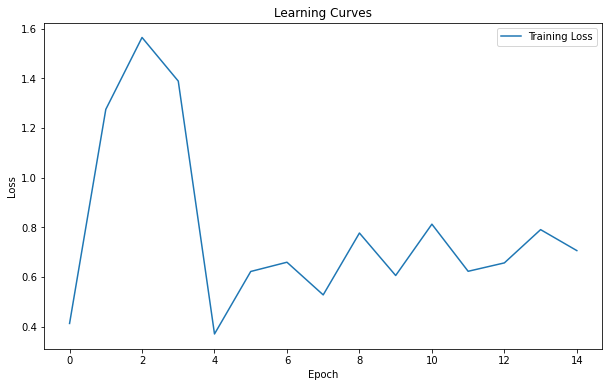

In [67]:
# Visualize learning curves
neural_net.visualize_learning_curves()